In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
bankfile = '../test7/histos_tb.17.npz'

with np.load(bankfile) as data:
  patterns_phi = data['patterns_phi']
  patterns_theta = data['patterns_theta']
  patterns_match = data['patterns_match']

In [3]:
nlayers = 12
layer_names = ['ME1/1', 'ME1/2', 'ME2', 'ME3', 'ME4', 
               'RE1', 'RE2', 'RE3', 'RE4', 
               'GE1/1', 'GE2/1', 'ME0']
ordered_layer_names = ['ME0', 'GE1/1', 'ME1/1', 
                       'ME1/2', 'RE1',
                       'GE2/1', 'RE2', 'ME2',
                       'ME3', 'RE3',
                       'ME4', 'RE4']
assert(len(layer_names) == nlayers)
assert(len(ordered_layer_names) == nlayers)

In [4]:
n_eta_bins = 7
n_pt_bins = 13

#gang = 32  # 'quadstrip' unit (4 * 8)
gang = 16  # 'doublestrip' unit (2 * 8)

patterns_phi_new = np.zeros((n_eta_bins,n_pt_bins,nlayers,3), dtype=np.int32)

for ieta in xrange(n_eta_bins):
  for ipt in xrange(n_pt_bins):
    for lay in xrange(nlayers):
      y = ordered_layer_names[::-1].index(layer_names[lay])
      assert((patterns_phi_new[ieta, ipt, y] == 0).all())
      patterns_phi_new[ieta, ipt, y] = patterns_phi[ipt,ieta,lay,:] / gang

# Debug
print patterns_phi[0,0,:,:]/gang
print patterns_phi_new[0,0]
print np.min(patterns_phi_new), np.max(patterns_phi_new)

[[-25 -15  -5]
 [  0   0   0]
 [-15  -1  14]
 [-16   2  19]
 [-19   1  21]
 [  0   0   0]
 [  0   0   0]
 [-17   2  20]
 [-20   1  22]
 [  0   0   0]
 [-17  -2  13]
 [-30 -20 -11]]
[[-20   1  22]
 [-19   1  21]
 [-17   2  20]
 [-16   2  19]
 [-15  -1  14]
 [  0   0   0]
 [-17  -2  13]
 [  0   0   0]
 [  0   0   0]
 [-25 -15  -5]
 [  0   0   0]
 [-30 -20 -11]]
-65 62


In [5]:
# Styling
plt.style.use('tdrstyle.mplstyle')

import matplotlib as mpl
mpl.rcParams['axes.labelpad'] = 0
mpl.rcParams['axes.labelsize'] = 0
mpl.rcParams['xtick.labelsize'] = 0
mpl.rcParams['ytick.labelsize'] = 0

In [6]:
x = np.arange(-64.5, 64.5, step=1)
y = np.arange(-0.5, 11.5, step=1)
X, Y = np.meshgrid(x, y)
extent = np.min(x), np.max(x), np.min(y), np.max(y)
print extent

#figsize = extent[1]-extent[0]+1, extent[3]-extent[2]+1
#figsize = figsize[0]/figsize[1]/3, 1.0/3
figsize = 2.5, 2.5

def func2(x, y, pattern):
  xc = x + 0.5
  x0 = pattern[:,0][:,np.newaxis]
  x1 = pattern[:,2][:,np.newaxis]
  check = (x0 <= xc) & (xc <= x1) & (x0 < x1)
  return check

(-64.5, 63.5, -0.5, 10.5)


/cvmfs/cms.cern.ch/slc6_amd64_gcc630/external/py2-matplotlib/1.5.2-omkpbe3/lib/python2.7/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


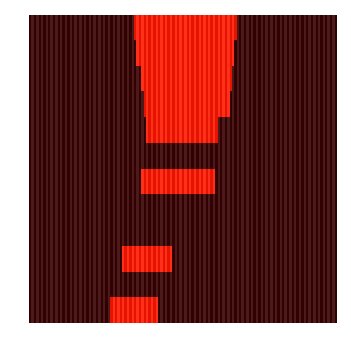

In [7]:
fig, ax = plt.subplots(figsize=figsize, tight_layout=True)

Z1 = np.zeros_like(X, dtype=np.int32)
for i in xrange(Z1.shape[1]):
  Z1[:,i] = i % 2
#im1 = ax.imshow(Z1, cmap=plt.cm.gray, interpolation='nearest', extent=extent)
im1 = ax.imshow(Z1, cmap=plt.cm.gray, interpolation='nearest', aspect='auto')
ax.axis('off')

pattern = patterns_phi_new[0,0]
Z2 = func2(X, Y, pattern)
#im2 = ax.imshow(Z2, cmap=plt.cm.viridis, alpha=.9, interpolation='bilinear', extent=extent)
im2 = ax.imshow(Z2, cmap=plt.cm.hot, vmin=-0.2, vmax=2.8, alpha=.9, interpolation='nearest', aspect='auto')
ax.axis('off')

plt.show()

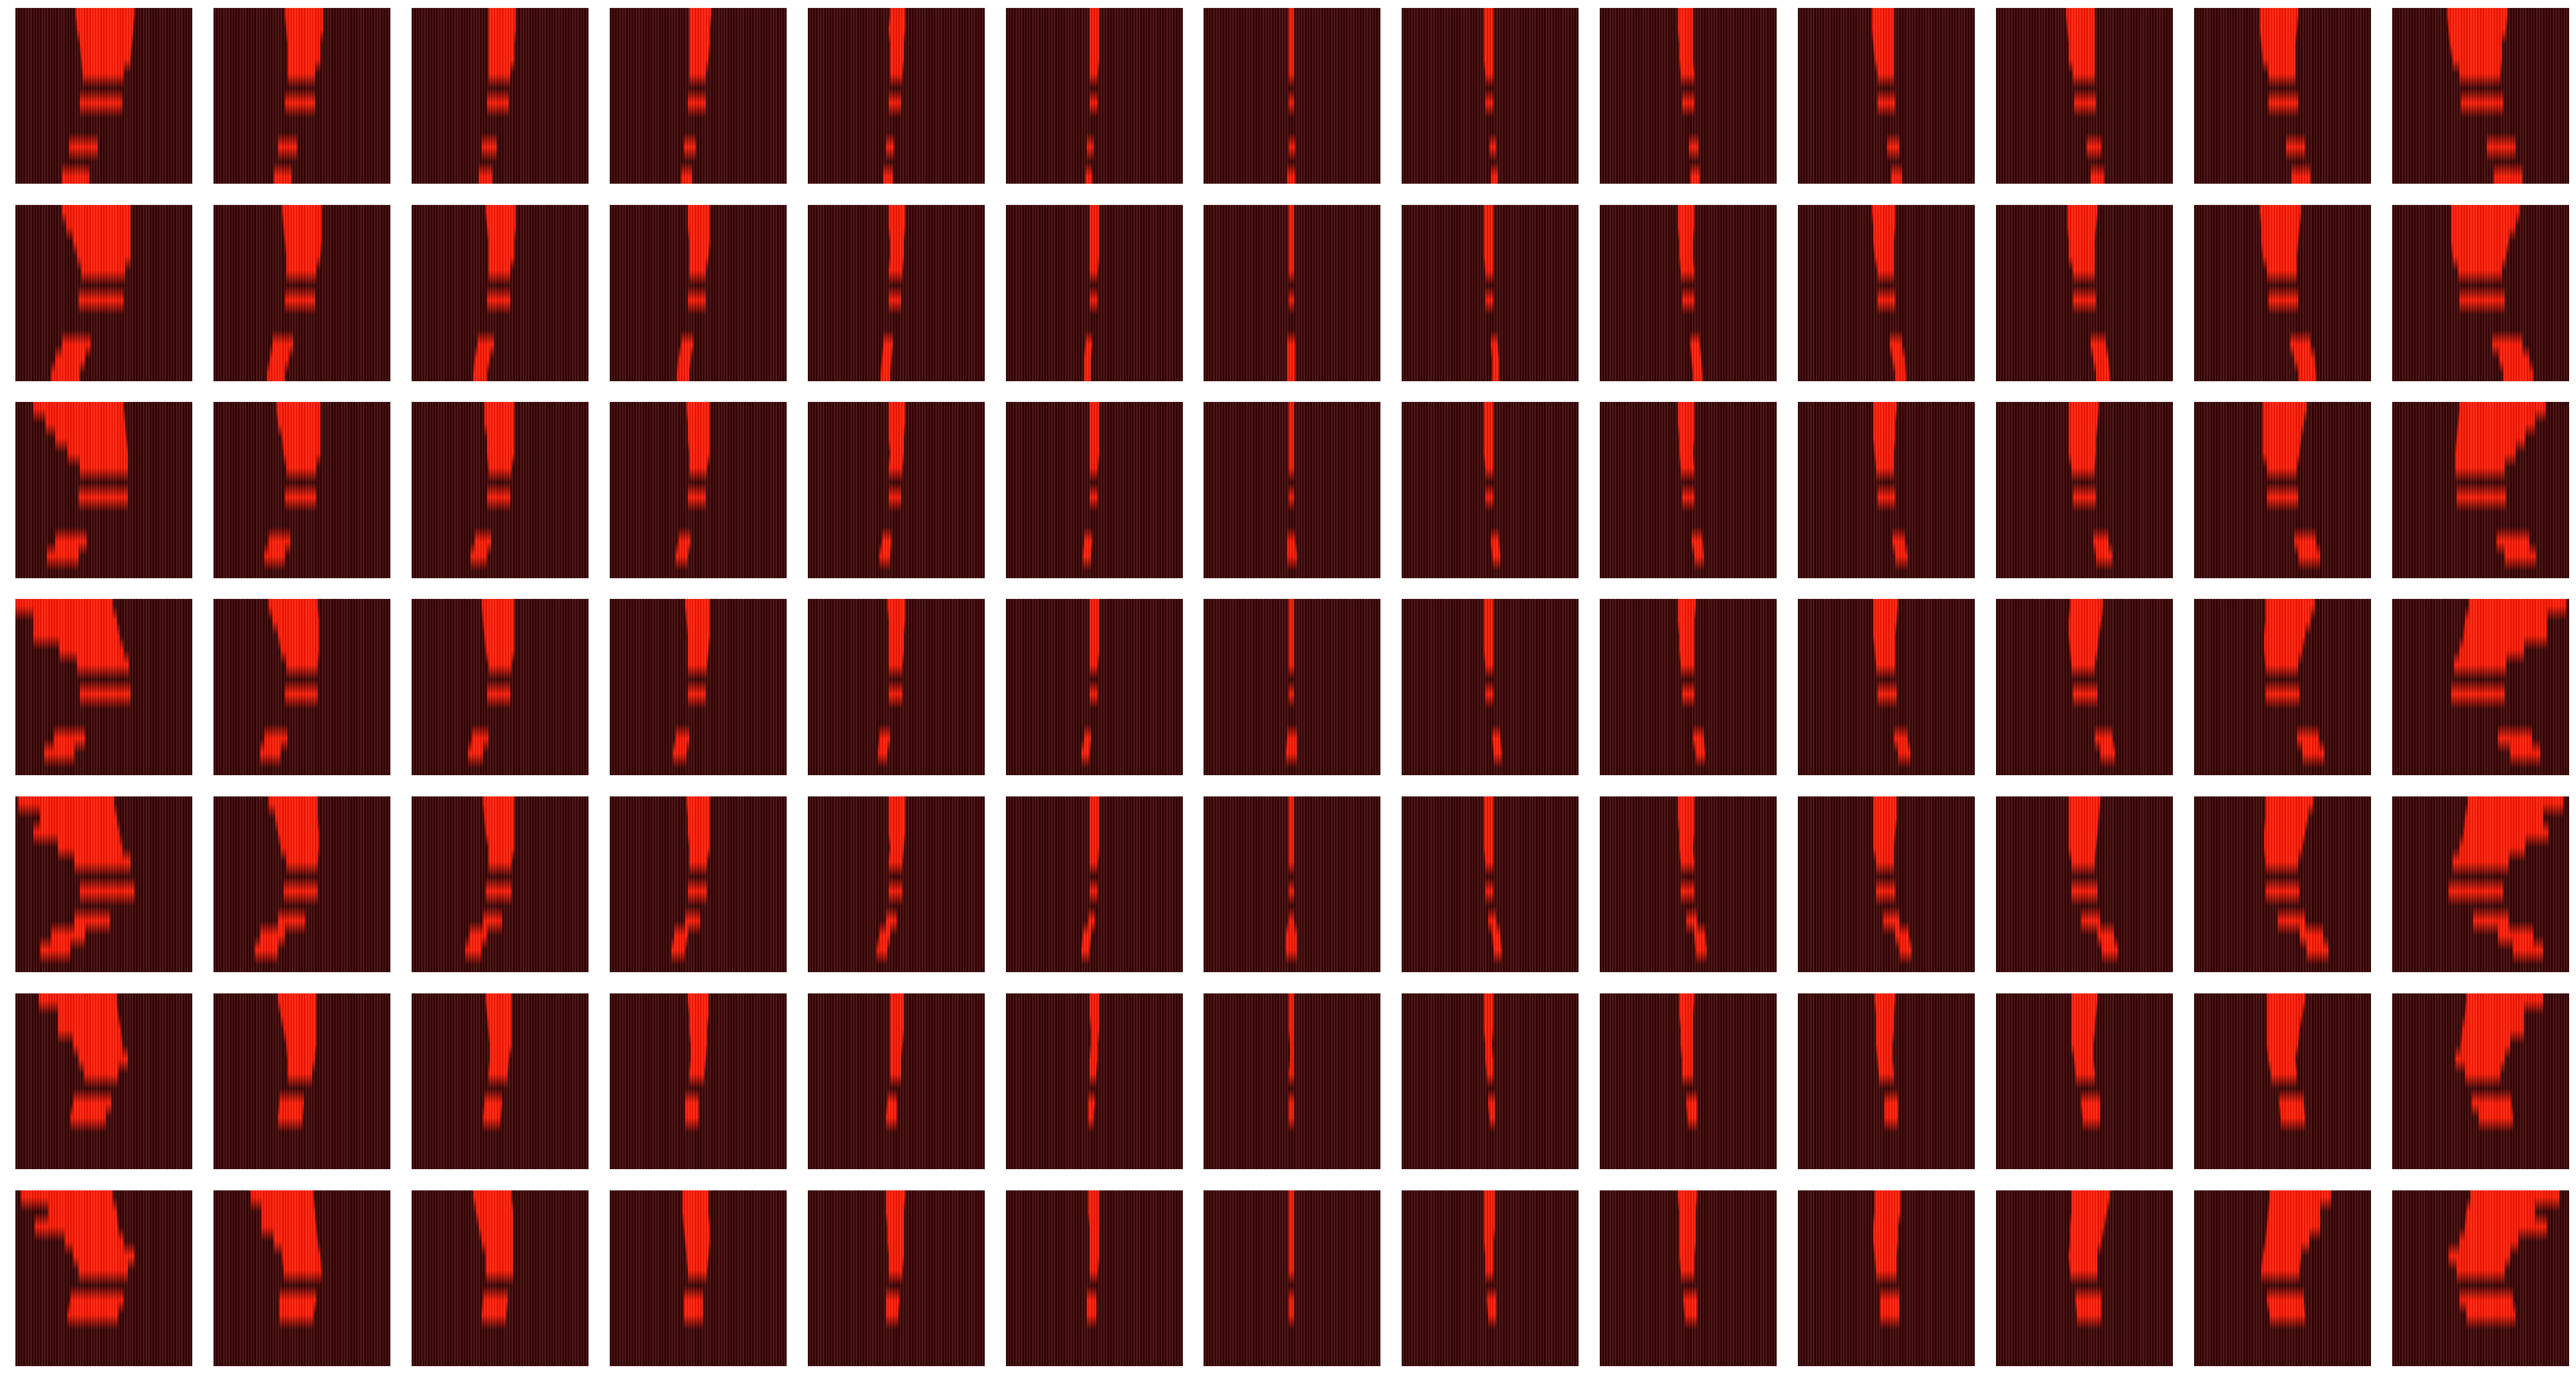

In [8]:
nrows, ncols = n_eta_bins, n_pt_bins
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(figsize[0]*ncols, figsize[1]*nrows), tight_layout=True)

Z1 = np.zeros_like(X, dtype=np.int32)
for i in xrange(Z1.shape[1]):
  Z1[:,i] = i % 2    
##im1 = plt.imshow(Z1, cmap=plt.cm.gray, interpolation='nearest', extent=extent)
#im1 = plt.imshow(Z1, cmap=plt.cm.gray, interpolation='nearest', aspect='auto')
#ax.axis('off')

for ieta in xrange(nrows):
  for ipt in xrange(ncols):
    #im1 = plt.imshow(Z1, cmap=plt.cm.gray, interpolation='nearest', extent=extent)
    im1 = axs[ieta,ipt].imshow(Z1, cmap=plt.cm.gray, interpolation='nearest', aspect='auto')
    axs[ieta,ipt].axis('off')
    
    pattern = patterns_phi_new[ieta,ipt]
    Z2 = func2(X, Y, pattern)
    #im2 = axs[ieta,ipt].imshow(Z2, cmap=plt.cm.viridis, alpha=.9, interpolation='bilinear', extent=extent)
    im2 = axs[ieta,ipt].imshow(Z2, cmap=plt.cm.hot, vmin=-0.2, vmax=2.8, alpha=.9, interpolation='bilinear', aspect='auto')
    axs[ieta,ipt].axis('off')

plt.show()

In [9]:
if False:
  def func3(x, y):
    return (1 - x / 2 + x**5 + y**3) * np.exp(-(x**2 + y**2))

  # make these smaller to increase the resolution
  dx, dy = 0.05, 0.05

  x = np.arange(-3.5, 3.5, dx)
  y = np.arange(-3.5, 3.5, dy)
  X, Y = np.meshgrid(x, y)
  extent = np.min(x), np.max(x), np.min(y), np.max(y)

In [10]:
if False:
  fig, ax = plt.subplots()

  Z1 = np.zeros((9,9), dtype=np.int32)
  for i in xrange(9):
    Z1[:,i] = i % 2
  im1 = plt.imshow(Z1, cmap=plt.cm.gray, interpolation='nearest', extent=extent)

  Z2 = func3(X, Y)
  im2 = plt.imshow(Z2, cmap=plt.cm.viridis, alpha=.9, interpolation='bilinear', extent=extent)

  plt.show()